Alumna: Maria Alejandra Del Porto

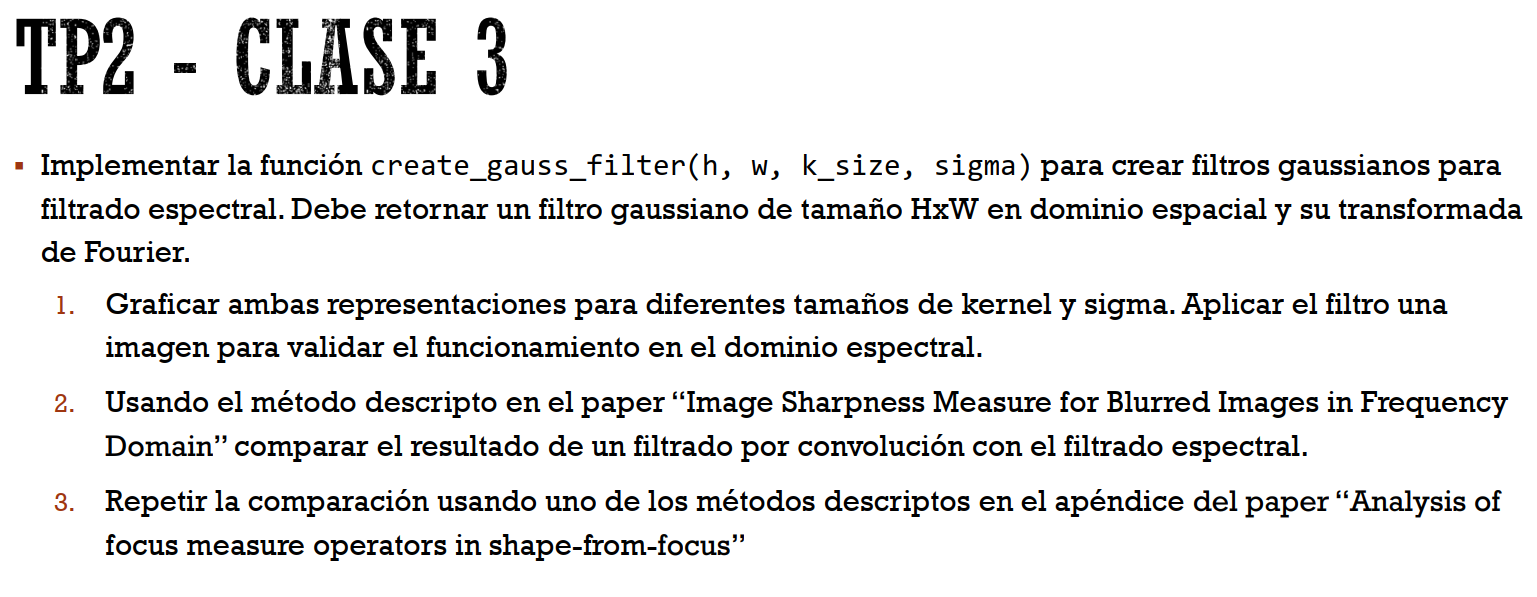

### Importaciones

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#from skimage.util import random_noise

### creación de filtros gaussianos y graficación

In [254]:
def create_gauss_filter(h, w, k_size, sigma):

    # Creación del kernel gaussiano en dominio espacial
    nucleo_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma) #así se obtiene el vector gaussiano
    kernel_space = nucleo_g * nucleo_g.T #para obtener el kernel gaussiano 
   
    # Creación del filtro espacial para los h (high) y w (width) suministrados
    ## Se crea una máscara de tamaño h x w con valores=0. 
    ## Posteriormente, se posiciona el kernel en el centro.
    
    ## máscara
    filtro = np.zeros((h, w))

    ## Calcular las coordenadas del centro de la máscara
    center_x, center_y = int(h / 2), int(w / 2)

    ## Calcular las coordenadas de la región donde se colocará el kernel
    #start_x, end_x = center_x - k_size // 2, center_x + k_size // 2 
    start_x  = center_x - int(k_size / 2)
    end_x = start_x + k_size
    #start_y, end_y =  center_y - k_size // 2, center_y + k_size // 2 
    start_y  = center_y - int(k_size / 2)
    end_y= start_y + k_size

    print("---------------------------------------------------")
    print("h,w: ", h,"x", w )
    print("máscara: " , filtro.shape)
    print("kernel: " , kernel_space.shape)
    print("center_x: " , center_x)
    print("center_y: " , center_y)
    print("start_x: " , start_x)
    print("end_x: " , end_x)
    print("start_y: " , start_y)
    print("end_y: " , end_y)


    ## Colocar el kernel en el centro de la máscara
    filtro[start_x:end_x, start_y:end_y] = filtro[start_x:end_x, start_y:end_y] + kernel_space 

    # filtro en el dominio espectral
    filtro_fft = np.fft.fft2(filtro) 

    return filtro, filtro_fft
     

In [155]:
# carga de la imagen que voy a usar para la validacion
img = cv.imread('./Material/chewbacca.jpg',cv.IMREAD_GRAYSCALE)
img.shape

(756, 1200)

In [255]:
# Parámetros
height, width = img.shape[0], img.shape[1] # es el tamaño de la imagen que voy a usar para la validación
sigma_values = [5, 25,125]
k_size_values = [ 5, 25, 125] 

# lista para guardar los filtros creados
filters_list = []

# Generar y guardar filtros
for sigma in sigma_values:
    for k_size in k_size_values:

        # Crear filtro gaussiano
        gauss_filter_space, gauss_filter_freq = create_gauss_filter(height, width, k_size, sigma)

        # Guardar filtros creados
        filters_list.append((gauss_filter_space, gauss_filter_freq, k_size, sigma))


---------------------------------------------------
h,w:  756 x 1200
máscara:  (756, 1200)
kernel:  (5, 5)
center_x:  378
center_y:  600
start_x:  376
end_x:  381
start_y:  598
end_y:  603
---------------------------------------------------
h,w:  756 x 1200
máscara:  (756, 1200)
kernel:  (25, 25)
center_x:  378
center_y:  600
start_x:  366
end_x:  391
start_y:  588
end_y:  613
---------------------------------------------------
h,w:  756 x 1200
máscara:  (756, 1200)
kernel:  (125, 125)
center_x:  378
center_y:  600
start_x:  316
end_x:  441
start_y:  538
end_y:  663
---------------------------------------------------
h,w:  756 x 1200
máscara:  (756, 1200)
kernel:  (5, 5)
center_x:  378
center_y:  600
start_x:  376
end_x:  381
start_y:  598
end_y:  603
---------------------------------------------------
h,w:  756 x 1200
máscara:  (756, 1200)
kernel:  (25, 25)
center_x:  378
center_y:  600
start_x:  366
end_x:  391
start_y:  588
end_y:  613
-----------------------------------------------

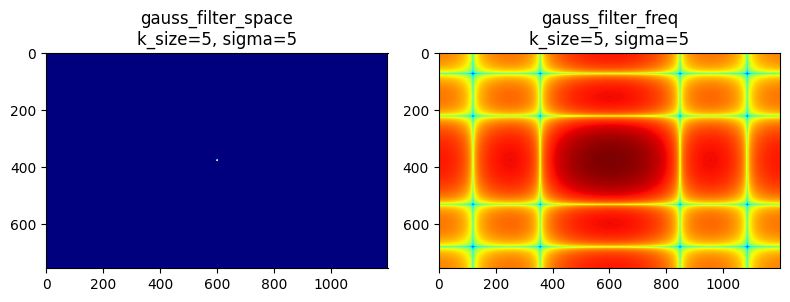

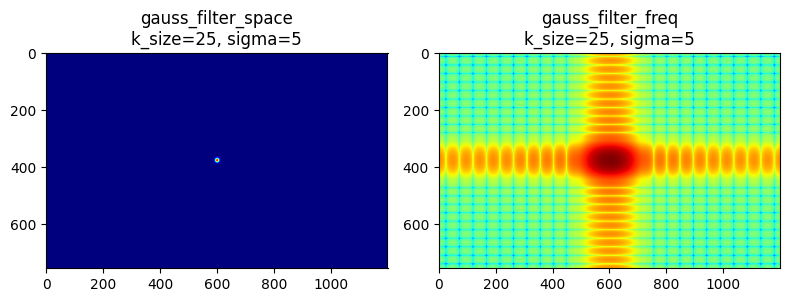

C:\Users\alede\AppData\Local\Temp\ipykernel_14912\1579678388.py:15: RuntimeWarning: divide by zero encountered in log
  gauss_filter_freq_log = (20 * np.log(np.abs(gauss_filter_freq_shifted))).astype('float64')


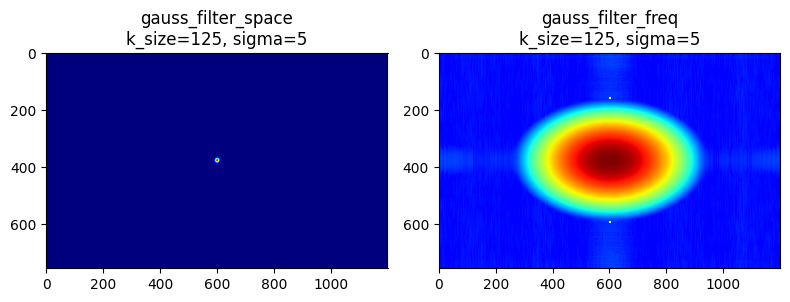

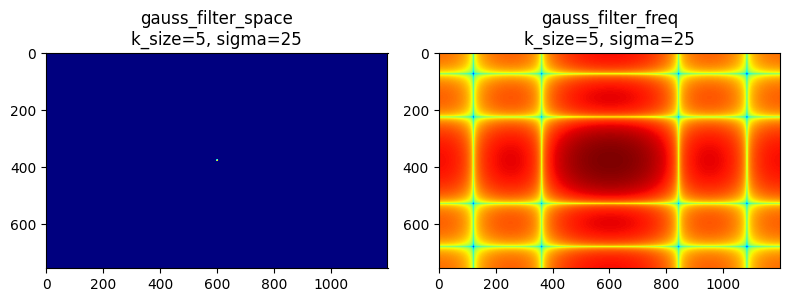

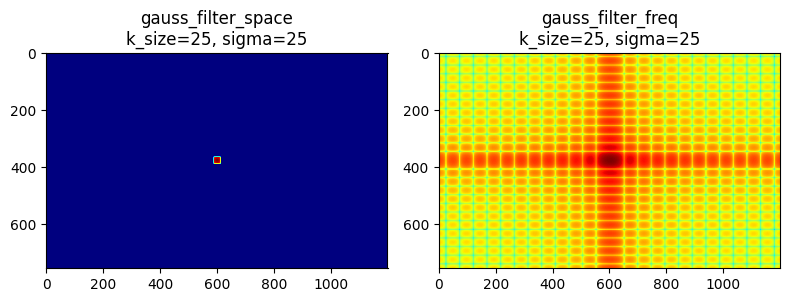

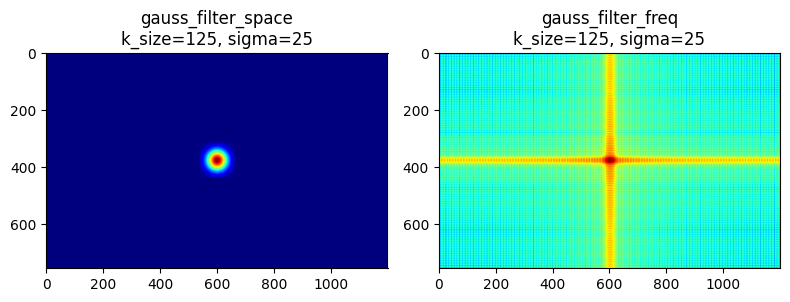

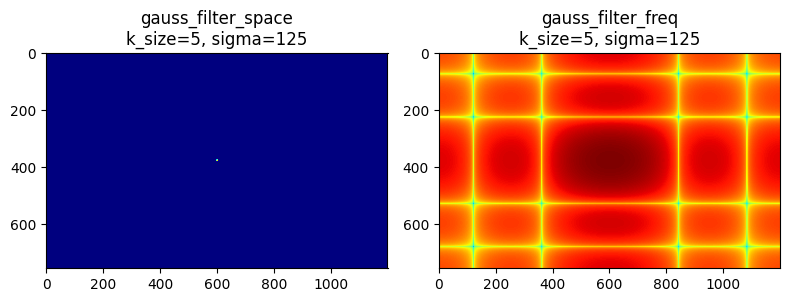

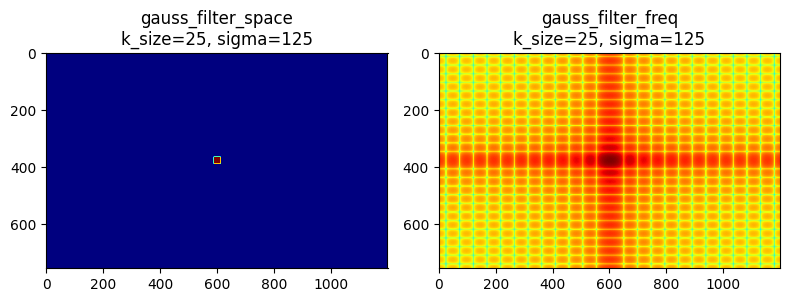

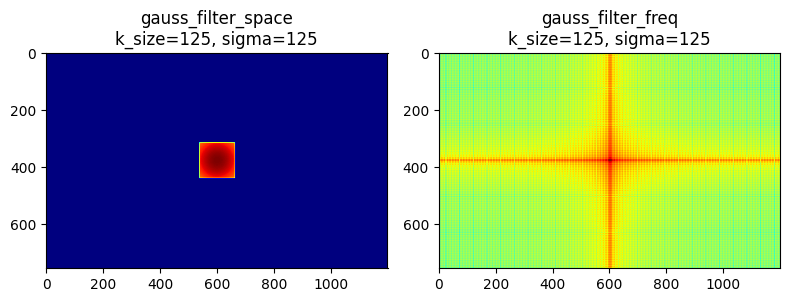

In [266]:
# Visualizar filtros creados
for i, filtro_tuple in enumerate(filters_list):
    gauss_filter_space = filtro_tuple[0]
    gauss_filter_freq = filtro_tuple[1]

    # Visualizar el filtro gaussiano en el dominio espacial
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(gauss_filter_space, cmap='jet')
    plt.title(f'gauss_filter_space\nk_size={filtro_tuple[2]}, sigma={filtro_tuple[3]}')

    # Visualizar la transformada de Fourier del filtro gaussiano
    plt.subplot(1, 2, 2)
    gauss_filter_freq_shifted = np.fft.fftshift(gauss_filter_freq)
    gauss_filter_freq_log = (20 * np.log(np.abs(gauss_filter_freq_shifted))).astype('float64')
    plt.imshow(gauss_filter_freq_log, cmap='jet')
    plt.title(f'gauss_filter_freq\nk_size={filtro_tuple[2]}, sigma={filtro_tuple[3]}')

    plt.tight_layout()
    plt.show()

### Validación de los filtros

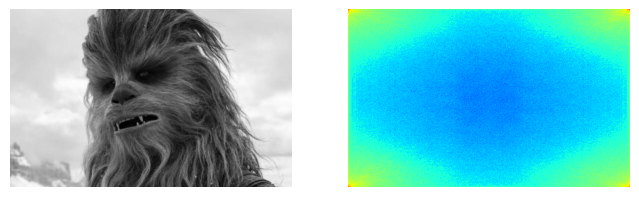

In [261]:
# cargo la imagen en escala de grises
img = cv.imread('./Material/chewbacca.jpg',cv.IMREAD_GRAYSCALE)
# obtengo el modulo de la transformada de fourier
img_fft = np.fft.fft2(img)

#para la visualización
shifted_img_fft  = np.fft.fftshift(img_fft)
mod_img_fft = (20*np.log(np.abs(shifted_img_fft))).astype('float64') 

# graficación de la imagen en espacio espacial y en espacio espectral
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(mod_img_fft, cmap='jet')

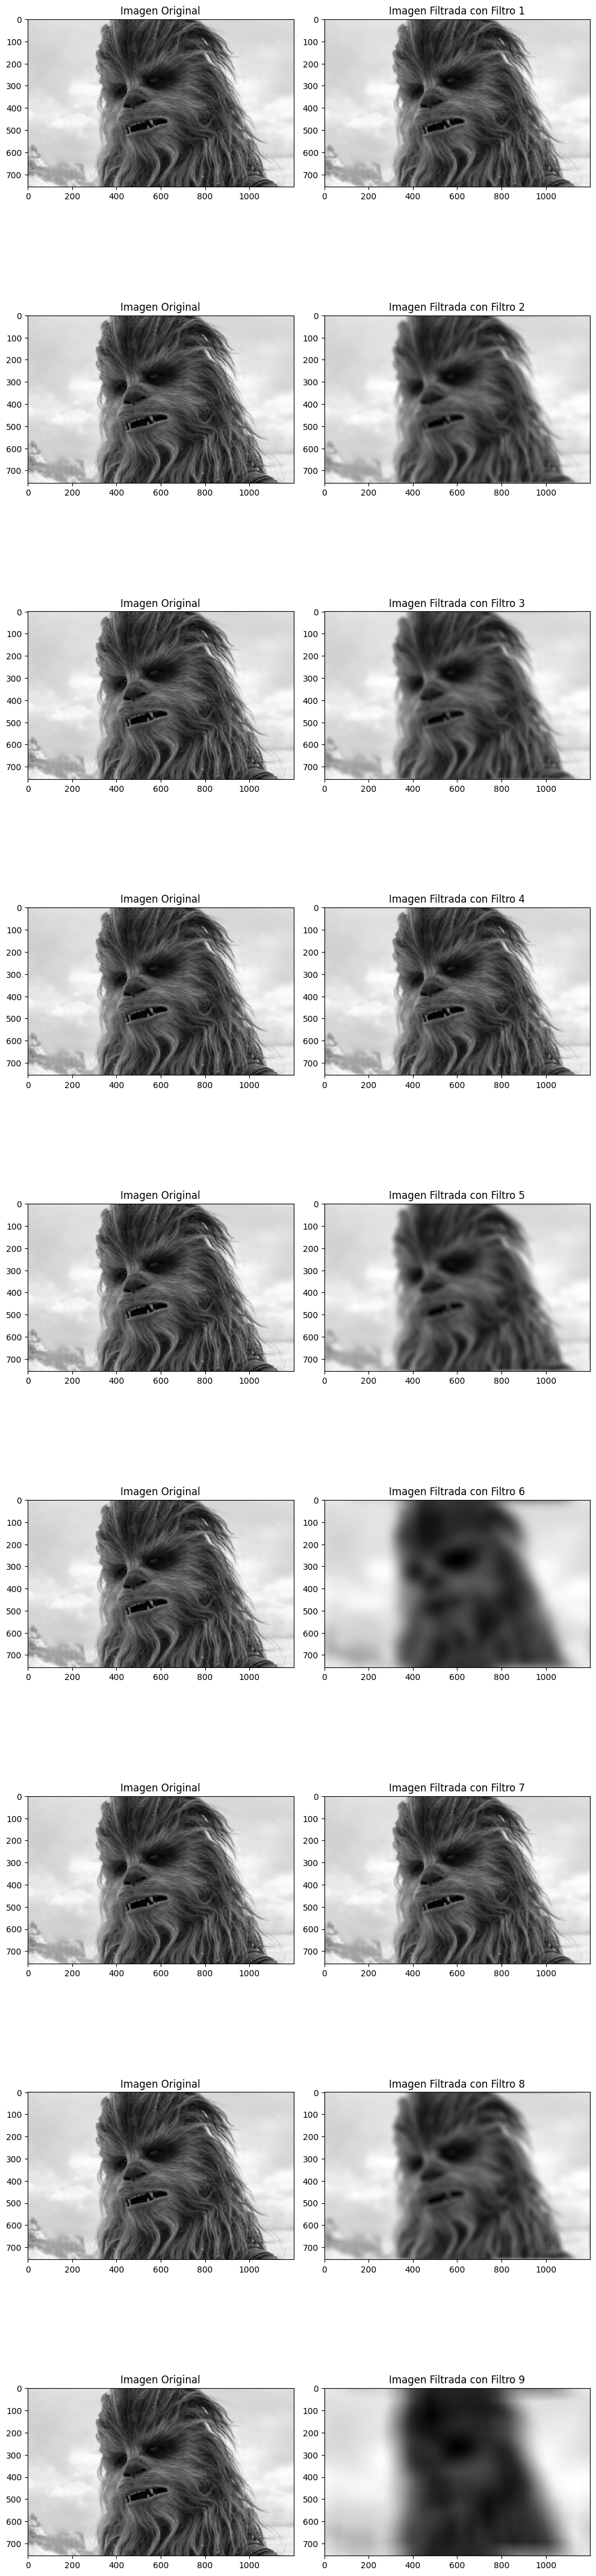

In [272]:
# Aplicación de los filtros sobre la imagen para validación

# Obtener la cantidad de filtros creados
num_filters = len(filters_list)

# Configurar la disposición del subplot
rows = num_filters
cols = 2  # Dos columnas: imagen original e imagen filtrada

# Crear el subplot
plt.figure(figsize=(10, 5 * num_filters))


for i, filtro_tuple in enumerate(filters_list):
    
    # cargo el filtro antes creado
    filter_freq = filtro_tuple[1]

    # # Aplicar el filtro en el dominio espectral
    filtered_fft_img = img_fft * filter_freq 

    # Aplicar la antitransformada para obtener la imagen filtrada
    img_filtrada_espacial = np.fft.ifft2(filtered_fft_img) # transformada inversa
    img_filtrada_espacial = np.real(img_filtrada_espacial) # no me quedo con la parte compleja de la imagen filtrada
    img_filtrada_espacial = np.fft.ifftshift(img_filtrada_espacial) # centro la imagen

    # Configurar el subplot para la imagen original
    plt.subplot(rows, cols, 2 * i + 1)
    plt.imshow(np.abs(img), cmap='gray')
    plt.title('Imagen Original')

    # Configurar el subplot para la imagen filtrada
    plt.subplot(rows, cols, 2 * i + 2)
    plt.imshow(np.abs(img_filtrada_espacial), cmap='gray')
    plt.title(f'Imagen Filtrada con Filtro {i + 1}')

plt.tight_layout()
plt.show()

### *-------------------- borrar despues *--------------------

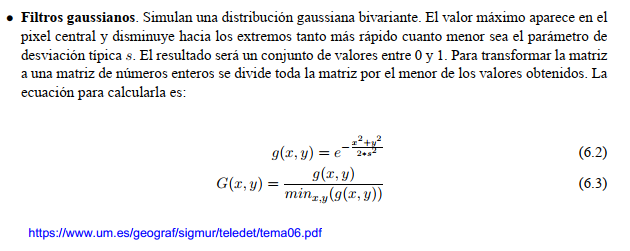

In [8]:
def create_gauss_filter(h, w, k_size, sigma):

    # Cálculo sigma si el proporcionado es negativo
    if sigma <= 0:
        sigma = 0.3 * (((k_size - 1) * 0.5) - 1) + 0.8

    # Crear un filtro gaussiano en el dominio espacial
    filter_space = np.zeros((h, w))
    center_h, center_w = h // 2, w // 2

    for i in range(h):
        for j in range(w):
            distance = ((i - center_h) ** 2 + (j - center_w) ** 2) / (2 * sigma ** 2)
            filter_space[i, j] = np.exp(-distance)

    # Normalizar el filtro
    filter_space /= np.min(filter_space)

    # Convertir la matriz a números enteros
    filter_space = (filter_space * 255).astype(np.uint8)

    # Calcular la transformada de Fourier del filtro espacial
    filter_freq = fftshift(fft2(filter_space))

    return filter_space, filter_freq


In [ ]:

def apply_filter(img, filter_freq):
    # Calcular la transformada de Fourier de la imagen
    img_freq = fftshift(fft2(img))

    # Aplicar el filtro en el dominio espectral
    img_filtered_freq = img_freq * filter_freq

    # Calcular la inversa de la transformada de Fourier para obtener la imagen filtrada
    img_filtered = np.abs(ifft2(fftshift(img_filtered_freq)))

    return img_filtered

def plot_filter_and_result(filter_space, filter_freq, img, img_filtered):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(filter_space, cmap='gray')
    plt.title('Filtro Gaussiano en el Dominio Espacial')

    plt.subplot(2, 3, 2)
    plt.imshow(np.log(1 + np.abs(filter_freq)), cmap='gray')
    plt.title('Transformada de Fourier del Filtro')

    plt.subplot(2, 3, 3)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(2, 3, 4)
    plt.imshow(np.log(1 + np.abs(fftshift(fft2(img)))), cmap='gray')
    plt.title('Transformada de Fourier de la Imagen Original')

    plt.subplot(2, 3, 5)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Imagen Filtrada en el Dominio Espacial')

    plt.subplot(2, 3, 6)
    plt.imshow(np.log(1 + np.abs(fftshift(fft2(img_filtered)))), cmap='gray')
    plt.title('Transformada de Fourier de la Imagen Filtrada')

    plt.tight_layout()
    plt.show()

# Parámetros
height, width = 256, 256
sigma_values = [1.0, 2.0, 3.0]
k_size_values = [3, 5, 7]

# Generar y visualizar filtros y resultados
for sigma in sigma_values:
    for k_size in k_size_values:
        # Crear filtro gaussiano
        gauss_filter_space, gauss_filter_freq = create_gauss_filter(height, width, k_size, sigma)

        # Aplicar filtro a una imagen de ejemplo
        example_image = np.random.rand(height, width)  # Una imagen de ruido aleatorio para el ejemplo
        filtered_image = apply_filter(example_image, gauss_filter_freq)

        # Mostrar resultados
        plot_filter_and_result(gauss_filter_space, gauss_filter_freq, example_image, filtered_image)


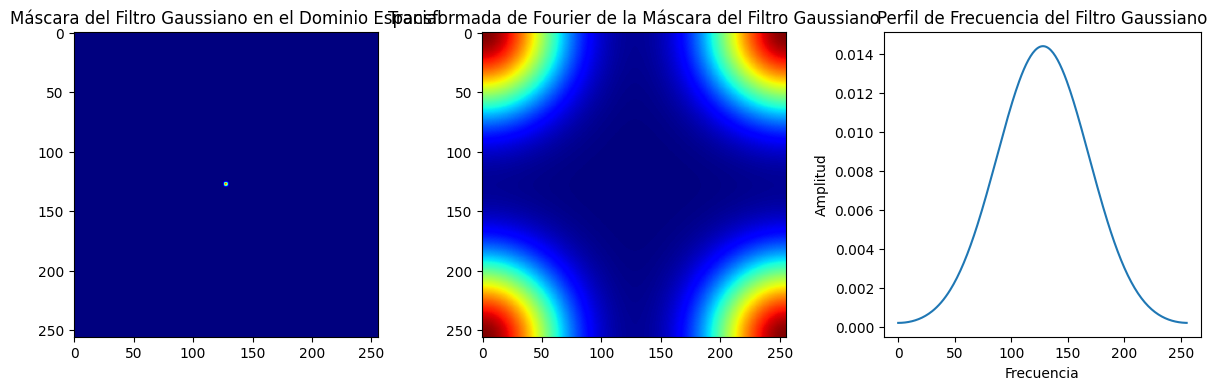

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para crear un filtro gaussiano y su transformada de Fourier
def create_gauss_filter(h, w, k_size, sigma):
    nucleo_g = cv2.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel = nucleo_g * nucleo_g.T
    filtro = np.zeros((h, w))
    inicio_fila = (filtro.shape[0] - kernel.shape[0]) // 2
    fin_fila = inicio_fila + kernel.shape[0]
    inicio_col = (filtro.shape[1] - kernel.shape[1]) // 2
    fin_col = inicio_col + kernel.shape[1]
    filtro[inicio_fila:fin_fila, inicio_col:fin_col] += kernel
    kernel_tf = np.fft.fft2(filtro)
    return filtro, kernel, kernel_tf

# Parámetros
height, width = 256, 256
k_size = 25
sigma = 1

# Crear filtro gaussiano y obtener la máscara
filtro_gauss, kernel_gauss, kernel_tf_gauss = create_gauss_filter(height, width, k_size, sigma)

# Visualizar la máscara en el dominio espacial
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(filtro_gauss, cmap='jet')
plt.title('Máscara del Filtro Gaussiano en el Dominio Espacial')

# Visualizar la transformada de Fourier de la máscara
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(kernel_tf_gauss)), cmap='jet')
plt.title('Transformada de Fourier de la Máscara del Filtro Gaussiano')

# Visualizar el perfil de frecuencia del filtro gaussiano
plt.subplot(1, 3, 3)
plt.plot(np.abs(np.fft.fftshift(kernel_tf_gauss[height//2, :])))
plt.title('Perfil de Frecuencia del Filtro Gaussiano')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


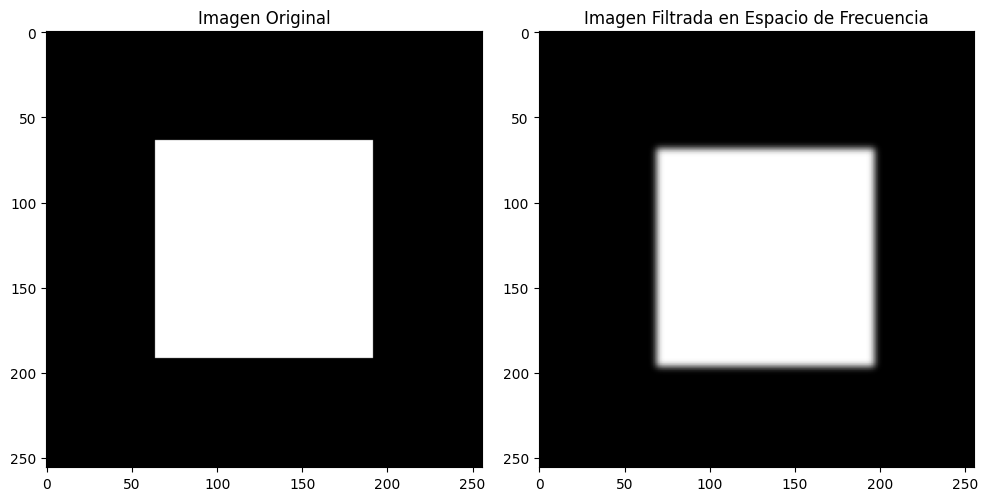

In [10]:
# Función para crear un filtro gaussiano y su transformada de Fourier
def create_gauss_filter(h, w, k_size, sigma):
    nucleo_g = cv2.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel = nucleo_g * nucleo_g.T
    kernel_tf = np.fft.fft2(kernel, s=(h, w))  # Ajustar el tamaño al de la imagen
    return kernel_tf

# Parámetros
height, width = 256, 256
k_size = 11
sigma = 2.0

# Crear imagen
img = np.zeros((height, width))
img[height//4:3*height//4, width//4:3*width//4] = 255

# Calcular la transformada de Fourier de la imagen
img_tf = np.fft.fft2(img)

# Crear filtro gaussiano con un tamaño diferente al de la imagen en el espacio de frecuencias
filtro_gauss_tf = create_gauss_filter(height, width, k_size, sigma)

# Aplicar el filtro en el espacio de frecuencias
img_filtered_tf = img_tf * filtro_gauss_tf

# Aplicar la antitransformada para obtener la imagen filtrada
img_filtered = np.real(np.fft.ifft2(img_filtered_tf))

# Visualizar la imagen original y la imagen filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(img_filtered), cmap='gray')
plt.title('Imagen Filtrada en Espacio de Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
lista=